### Applying K-Nearest Neighbors Classification algorithm to predict which category a given fruit falls into from the existing categories

In [48]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

fruits = pd.read_csv("fruit_data_with_colors.txt",sep='\t')

In [49]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### So, the fruits are classified based on their mass, width, height, color_score

In [50]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [51]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [52]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [53]:
fruits.fruit_label.unique()

array([1, 2, 3, 4])

In [54]:
# creating a dictonary by mapping from fruit label value to fruit name to understand the number assgined to each fruit and make results easier to interpret
fruit_names_dict = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
fruit_names_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Data Visualization

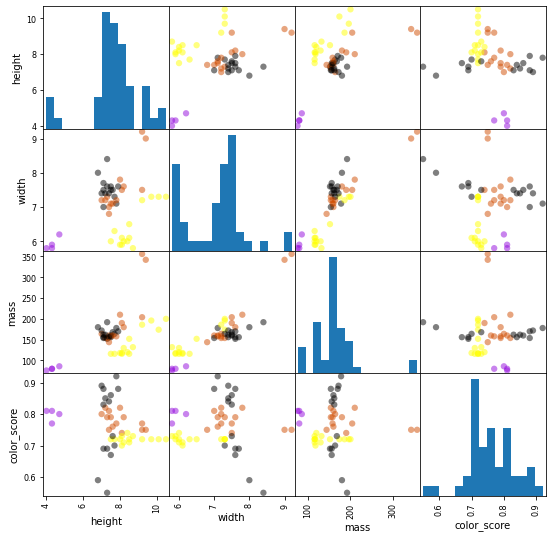

In [55]:
# plotting a scatter matrix to examine how the data points are ditributed
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

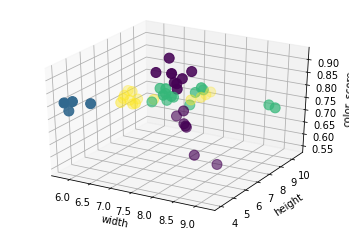

In [56]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Craeating train_test_split

In [57]:
# using the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# size is 75% / 25% train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,test_size=0.25)

### creating a classifier object

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [59]:
knn.fit(X_train, y_train)

predict = knn.predict(X_test)
print(predict)
print(accuracy_score(y_test, predict))

[4 2 3 4 1 1 4 1 1 3 1 3 3 3 2]
0.7333333333333333


### Applying the classifier on new data sample

In [60]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction)
fruit_names_dict[fruit_prediction[0]]

[2]


'mandarin'

In [61]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
fruit_names_dict[fruit_prediction[0]]

'lemon'

### checking how our KNN classifier performs on varying K

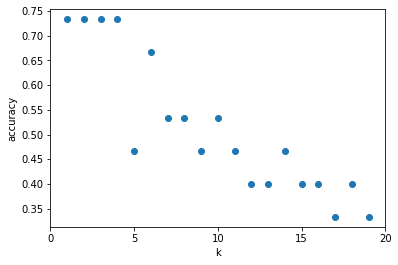

In [62]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [63]:
X.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


### Since KNN works on the distance between data points, the data should be scaled down. This will improve the performance of KNN algorithm

In [64]:
# use min max scaling to preprocess the data
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn_scaled = KNeighborsClassifier(n_neighbors = 3)
knn_scaled.fit(X_train, y_train)
knn_scaled.score(X_test, y_test) 

0.9166666666666666

In [66]:
# Using out first example again to do prediction
fruit_prediction = knn_scaled.predict([[0.27, 0.35, 0.47]])
lookup_fruit_name[fruit_prediction[0]]

'orange'